In [1]:
!pip install pandas-datareader

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\envs\deep_learning\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\anaconda3\envs\deep_learning\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\user\anaconda3\envs\deep_learning\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
start = '2011-01-01'
end = '2020-12-31'


df = data.DataReader("AAPL", 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.836143
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.049909
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.102357
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.184996
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.176763


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.620911
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.292648
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.491241
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,132.353012
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.333527


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.836143
1,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.049909
2,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.102357
3,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.184996
4,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.176763


In [5]:
df= df.drop(['Date', "Adj Close"], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,11.973214,11.889286,11.954286,11.918929,300428800.0


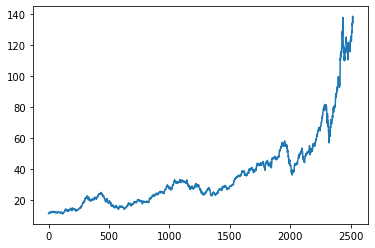

In [6]:
plt.plot(df.High)

In [7]:
ma100 = df.High.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513    119.947500
2514    120.216975
2515    120.460750
2516    120.683900
2517    120.893550
Name: High, Length: 2518, dtype: float64

In [8]:
ma200 = df.High.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513    100.535825
2514    100.872625
2515    101.242725
2516    101.600663
2517    101.961863
Name: High, Length: 2518, dtype: float64

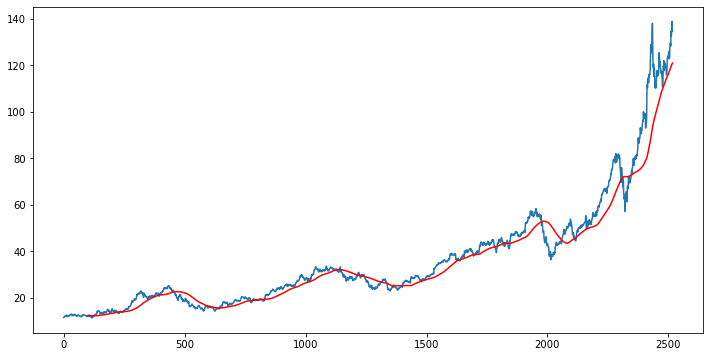

In [9]:
"""
10 Days Moving average
"""
plt.figure(figsize=(12, 6))
plt.plot(df.High)
plt.plot(ma100, 'r')

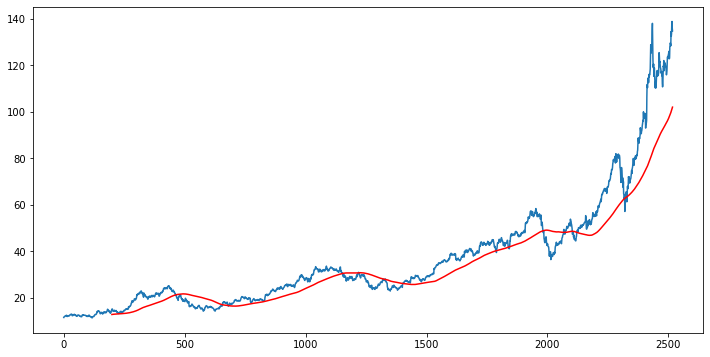

In [11]:
"""
200 Days moving average
"""
plt.figure(figsize=(12, 6))
plt.plot(df.High)
plt.plot(ma200, 'r')

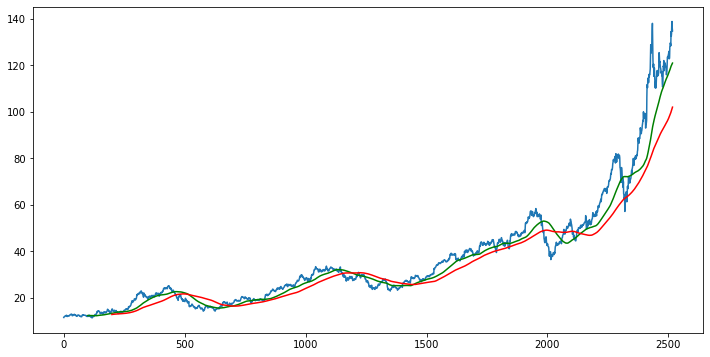

In [12]:
"""
wo ma
100 days m       a
200 Days moving average
"""
plt.figure(figsize=(12, 6))
plt.plot(df.High)
plt.plot(ma100, 'g')
plt.plot(ma200, 'r')

In [13]:
data_training = pd.DataFrame(df['High'][0:int(len(df)*0.80)])
data_testing = pd.DataFrame(df['High'][int(len(df)*0.80):int(len(df))])

In [14]:
data_testing

,High
2014,36.430000
2015,37.137501
2016,37.207500
2017,37.955002
2018,38.632500
...,...
2513,133.460007
2514,137.339996
2515,138.789993
2516,135.990005


In [15]:
data_training

,High
0,11.552857
1,11.795000
2,11.875000
3,11.940714
4,11.973214
...,...
2009,39.307499
2010,39.192501
2011,39.630001
2012,39.840000


In [16]:
data_training.head()

,High
0,11.552857
1,11.795000
2,11.875000
3,11.940714
4,11.973214


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00439013],
       [0.00953979],
       [0.01124115],
       ...,
       [0.60150846],
       [0.60597452],
       [0.603263  ]])

In [19]:
x_train = []

y_train = []

In [20]:
data_training_array.shape

(2014, 1)

In [21]:
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(1914, 100, 1)

In [23]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units=70, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.5))

model.add(LSTM(units=90, activation = 'relu', return_sequences = True))
model.add(Dropout(0.6))

model.add(Dense(units=1))

# Model Summary

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 70)           36680     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 70)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 80)           4

In [26]:
model.compile(optimizer="adam", loss = "mean_squared_error")
model.fit(x_train, y_train, epochs=2)

Epoch 1/2
60/60 [==============================] - 48s 372ms/step - loss: 0.0547
Epoch 2/2
60/60 [==============================] - 22s 375ms/step - loss: 0.0215


In [27]:
past100days = data_training.tail(100)
finalTesdata= past100days.append(data_testing, ignore_index = True)


In [28]:
finalTesdata

,High
0,52.445000
1,52.275002
2,52.737499
3,52.639999
4,52.685001
...,...
599,133.460007
600,137.339996
601,138.789993
602,135.990005


In [29]:
input_data = scaler.fit_transform(finalTesdata)
input_data

array([[0.15645761],
       [0.15479682],
       [0.15931516],
       [0.15836264],
       [0.15880229],
       [0.16630032],
       [0.17641169],
       [0.17941578],
       [0.17455551],
       [0.17252834],
       [0.17421358],
       [0.1738472 ],
       [0.17834117],
       [0.18273739],
       [0.18994238],
       [0.20159242],
       [0.20308226],
       [0.20383938],
       [0.20503615],
       [0.1993699 ],
       [0.194534  ],
       [0.18593691],
       [0.19192069],
       [0.19363033],
       [0.20181226],
       [0.19812427],
       [0.18862349],
       [0.18593691],
       [0.18049042],
       [0.18698711],
       [0.18474014],
       [0.18449589],
       [0.18830601],
       [0.19057738],
       [0.19714734],
       [0.19568191],
       [0.20442556],
       [0.20584214],
       [0.21431713],
       [0.2115817 ],
       [0.20195879],
       [0.19314187],
       [0.1991745 ],
       [0.19692754],
       [0.18019735],
       [0.18845254],
       [0.18588806],
       [0.188

In [30]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[[i, 0]])
    


In [31]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(504, 100, 1)
(504, 2, 1)


In [32]:
ypred= model.predict(x_test)

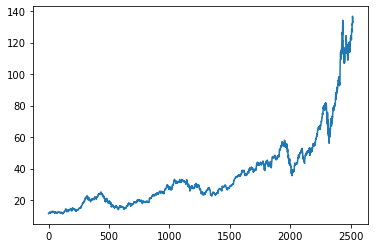

In [33]:
plt.plot(df.Close)

In [34]:
scaler.scale_[0]

0.00976944185787546

In [35]:
y_test.shape

(504, 2, 1)

In [37]:
ypred.shape

(504, 100, 1)

In [36]:
scale_factor = 1/0.00976944185787546
y_pred = ypred * scale_factor
y_test_sf = y_test * scale_factor

In [37]:
y_test_sf.shape
y_pred.shape

(504, 100, 1)

In [56]:
ytest_sf_reshape = pd.DataFrame(y_test_sf.reshape(-1))
ytest_sf_reshape.columns = ['High']

In [67]:
type(df.High)

pandas.core.series.Series

In [66]:
type(ytest_sf_reshape.High)

pandas.core.series.Series

<AxesSubplot:>

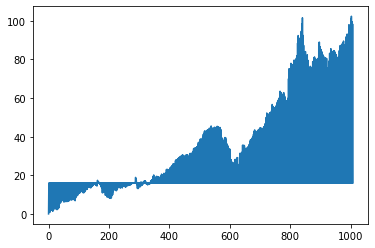

In [61]:
ytest_sf_reshape.High.plot()

In [70]:
import seaborn as sns

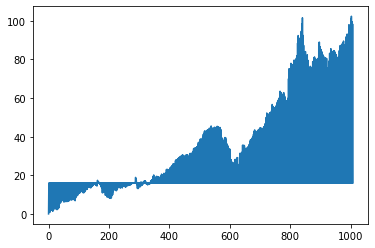

In [85]:
plt.plot(ytest_sf_reshape)
# sns.subplot(1,2,1)



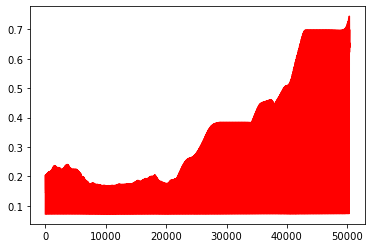

In [87]:
# plt.figure(figsize=(12,6))

plt.plot(pd.DataFrame(ypred.reshape(-1)).values, 'r', label = 'Pred Price')
plt.show()

In [79]:
ytest

,close
0,0.000000
1,16.672501
2,1.517498
3,16.672501
4,1.434998
...,...
1003,16.672501
1004,98.172501
1005,16.672501
1006,97.142502


In [83]:
ytest.columns= ['close']

In [46]:
list(y_test.reshape(-1))

[0.0,
 16.672500610351562,
 1.5174980163574212,
 16.672500610351562,
 1.4349975585937456,
 16.672500610351562,
 2.139999389648437,
 16.672500610351562,
 2.7799987792968746,
 16.672500610351562,
 2.902500152587889,
 16.672500610351562,
 2.524997711181639,
 16.672500610351562,
 1.952499389648437,
 16.672500610351562,
 2.720001220703121,
 16.672500610351562,
 3.1874999999999987,
 16.672500610351562,
 3.4174995422363246,
 16.672500610351562,
 3.6575012207031206,
 16.672500610351562,
 2.777500152587887,
 16.672500610351562,
 2.9324989318847625,
 16.672500610351562,
 2.627498626708981,
 16.672500610351562,
 3.892498016357422,
 16.672500610351562,
 3.5275001525878866,
 16.672500610351562,
 3.1224975585937504,
 16.672500610351562,
 5.764999389648433,
 16.672500610351562,
 6.062499999999996,
 16.672500610351562,
 6.082500457763667,
 16.672500610351562,
 7.264999389648433,
 16.672500610351562,
 7.997497558593748,
 16.672500610351562,
 8.01250076293945,
 16.672500610351562,
 7.187500000000001,
 1

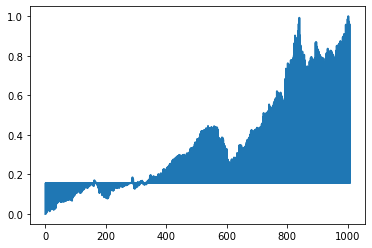

In [94]:
plt.plot(list(y_test.reshape(-1)),linewidth=2)